#Structural patterns


In Software Engineering, Structural Design Patterns are Design Patterns that ease the design by identifying a simple way to realize relationships between entities. (Source: https://sourcemaking.com/design_patterns/structural_patterns)

#Adapter
Match interfaces of different classes (Source: https://sourcemaking.com/design_patterns/adapter)

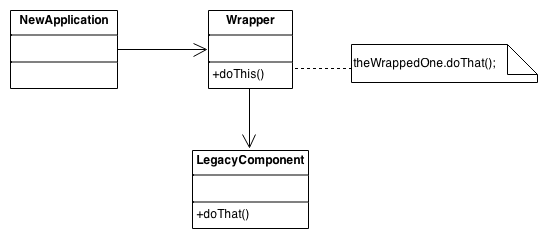

In [1]:
# Legacy payment system
class LegacyPaymentSystem:
    def make_payment(self, amount):
        print(f"Legacy Payment System: Making payment of {amount} units")

# New payment system with a different interface
class NewPaymentSystem:
    def pay(self, amount):
        print(f"New Payment System: Paying {amount} units")

# Adapter to adapt the interface of LegacyPaymentSystem to NewPaymentSystem
class PaymentAdapter(NewPaymentSystem):
    def __init__(self, legacy_payment_system):
        self.legacy_payment_system = legacy_payment_system

    def pay(self, amount):
        self.legacy_payment_system.make_payment(amount)

# Client code
if __name__ == "__main__":
    # Using the legacy payment system directly
    legacy_payment = LegacyPaymentSystem()
    legacy_payment.make_payment(100)

    # Using the new payment system directly
    new_payment = NewPaymentSystem()
    new_payment.pay(200)

    # Using the adapter to integrate the legacy payment system with the new system
    adapter = PaymentAdapter(legacy_payment)
    adapter.pay(300)


Legacy Payment System: Making payment of 100 units
New Payment System: Paying 200 units
Legacy Payment System: Making payment of 300 units


#Bridge
Separates an object's interface from its implementation (Source: https://sourcemaking.com/design_patterns/bridge)

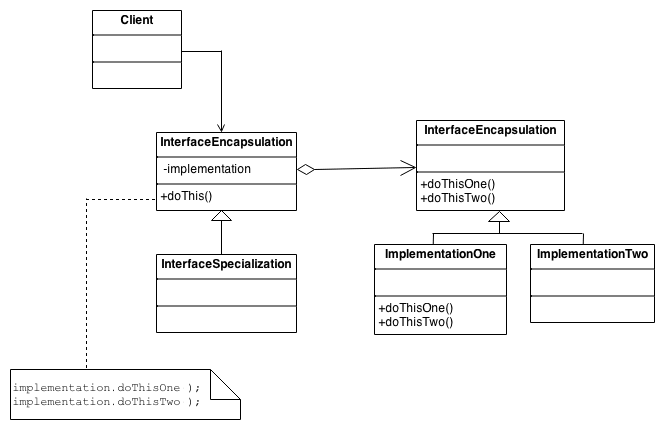

In [2]:
# Abstraction interface
class Abstraction:
    def __init__(self, implementation):
        self.implementation = implementation

    def operation(self):
        return f"Abstraction: {self.implementation.operation_implementation()}"

# Implementor interface
class Implementor:
    def operation_implementation(self):
        pass

# Concrete Implementor A
class ConcreteImplementorA(Implementor):
    def operation_implementation(self):
        return "ConcreteImplementorA: Operation implementation A"

# Concrete Implementor B
class ConcreteImplementorB(Implementor):
    def operation_implementation(self):
        return "ConcreteImplementorB: Operation implementation B"

# Client code
if __name__ == "__main__":
    implementation_a = ConcreteImplementorA()
    abstraction_a = Abstraction(implementation_a)
    print(abstraction_a.operation())

    implementation_b = ConcreteImplementorB()
    abstraction_b = Abstraction(implementation_b)
    print(abstraction_b.operation())


Abstraction: ConcreteImplementorA: Operation implementation A
Abstraction: ConcreteImplementorB: Operation implementation B


#Composite
A tree structure of simple and composite objects (Source: https://sourcemaking.com/design_patterns/composite)

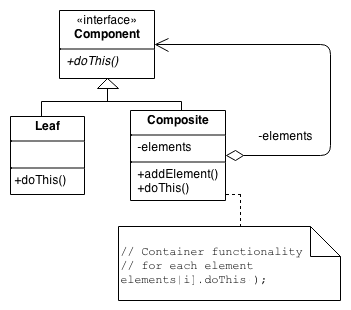

In [3]:
from abc import ABC, abstractmethod

# Component interface
class Component(ABC):
    @abstractmethod
    def operation(self):
        pass

# Leaf class
class Leaf(Component):
    def __init__(self, name):
        self.name = name

    def operation(self):
        return f"Leaf: {self.name}"

# Composite class
class Composite(Component):
    def __init__(self, name):
        self.name = name
        self.children = []

    def add(self, component):
        self.children.append(component)

    def remove(self, component):
        self.children.remove(component)

    def operation(self):
        result = f"Composite: {self.name}\n"
        for child in self.children:
            result += f"  {child.operation()}\n"
        return result

# Client code
if __name__ == "__main__":
    leaf1 = Leaf("Leaf 1")
    leaf2 = Leaf("Leaf 2")
    leaf3 = Leaf("Leaf 3")

    composite = Composite("Composite 1")
    composite.add(leaf1)
    composite.add(leaf2)

    composite2 = Composite("Composite 2")
    composite2.add(leaf3)

    composite.add(composite2)

    print(composite.operation())


Composite: Composite 1
  Leaf: Leaf 1
  Leaf: Leaf 2
  Composite: Composite 2
  Leaf: Leaf 3




#Decorator
Add responsibilities to objects dynamically (Source: https://sourcemaking.com/design_patterns/decorator)

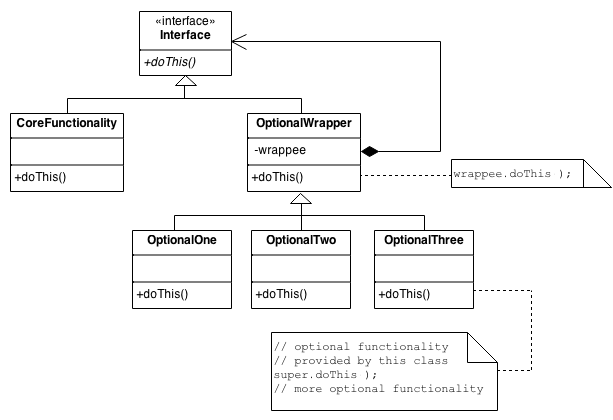

In [9]:
from abc import ABC, abstractmethod

# Component interface
class Component(ABC):
    @abstractmethod
    def operation(self):
        pass

# Concrete component
class ConcreteComponent(Component):
    def operation(self):
        return "ConcreteComponent: operation"

# Decorator base class
class Decorator(Component):
    def __init__(self, component):
        self._component = component

    def operation(self):
        return self._component.operation()

# Concrete decorators
class ConcreteDecoratorA(Decorator):
    def operation(self):
        return f"ConcreteDecoratorA: {self._component.operation()}"

class ConcreteDecoratorB(Decorator):
    def operation(self):
        return f"ConcreteDecoratorB: {self._component.operation()}"

# Client code
if __name__ == "__main__":
    component = ConcreteComponent()
    print("Client: I have a simple component:")
    print(component.operation())

    decorated_component = ConcreteDecoratorA(component)
    print("\nClient: Now I have a decorated component:")
    print(decorated_component.operation())

    doubly_decorated_component = ConcreteDecoratorB(decorated_component)
    print("\nClient: Now I have a doubly decorated component:")
    print(doubly_decorated_component.operation())


Client: I have a simple component:
ConcreteComponent: operation

Client: Now I have a decorated component:
ConcreteDecoratorA: ConcreteComponent: operation

Client: Now I have a doubly decorated component:
ConcreteDecoratorB: ConcreteDecoratorA: ConcreteComponent: operation


#Facade
A single class that represents an entire subsystem (Source: https://sourcemaking.com/design_patterns/facade)

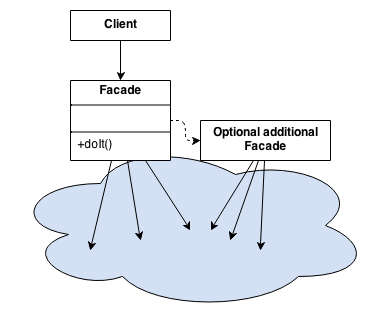

In [10]:
# Subsystem class 1
class Subsystem1:
    def operation1(self):
        return "Subsystem 1: operation 1"

    def operation2(self):
        return "Subsystem 1: operation 2"

# Subsystem class 2
class Subsystem2:
    def operation1(self):
        return "Subsystem 2: operation 1"

    def operation2(self):
        return "Subsystem 2: operation 2"

# Facade class
class Facade:
    def __init__(self):
        self._subsystem1 = Subsystem1()
        self._subsystem2 = Subsystem2()

    def operation(self):
        result = "Facade initializes subsystems:\n"
        result += self._subsystem1.operation1() + "\n"
        result += self._subsystem2.operation1() + "\n"
        result += "Facade orders subsystems to perform the action:\n"
        result += self._subsystem1.operation2() + "\n"
        result += self._subsystem2.operation2() + "\n"
        return result

# Client code
if __name__ == "__main__":
    facade = Facade()
    print(facade.operation())


Facade initializes subsystems:
Subsystem 1: operation 1
Subsystem 2: operation 1
Facade orders subsystems to perform the action:
Subsystem 1: operation 2
Subsystem 2: operation 2



#Flyweight
A fine-grained instance used for efficient sharing (Source: https://sourcemaking.com/design_patterns/flyweight)

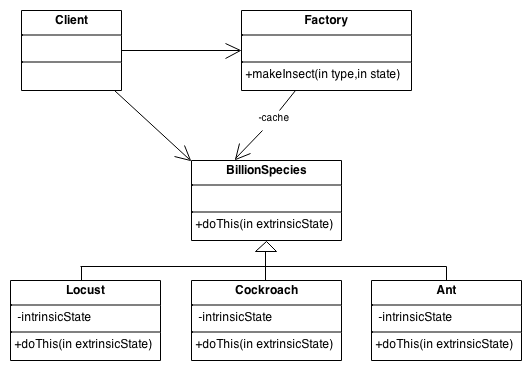

In [11]:
# Flyweight factory
class FlyweightFactory:
    _flyweights = {}

    @staticmethod
    def get_flyweight(key):
        if key not in FlyweightFactory._flyweights:
            FlyweightFactory._flyweights[key] = ConcreteFlyweight(key)
        return FlyweightFactory._flyweights[key]

# Flyweight interface
class Flyweight:
    def operation(self, extrinsic_state):
        pass

# Concrete Flyweight
class ConcreteFlyweight(Flyweight):
    def __init__(self, intrinsic_state):
        self._intrinsic_state = intrinsic_state

    def operation(self, extrinsic_state):
        return f"ConcreteFlyweight with intrinsic state '{self._intrinsic_state}' and extrinsic state '{extrinsic_state}'"

# Client code
if __name__ == "__main__":
    extrinsic_state = "Extrinsic state"
    flyweight1 = FlyweightFactory.get_flyweight("key1")
    print(flyweight1.operation(extrinsic_state))

    flyweight2 = FlyweightFactory.get_flyweight("key2")
    print(flyweight2.operation(extrinsic_state))


ConcreteFlyweight with intrinsic state 'key1' and extrinsic state 'Extrinsic state'
ConcreteFlyweight with intrinsic state 'key2' and extrinsic state 'Extrinsic state'


#Private Class Data
Restricts accessor/mutator access (Source: https://sourcemaking.com/design_patterns/private_class_data)

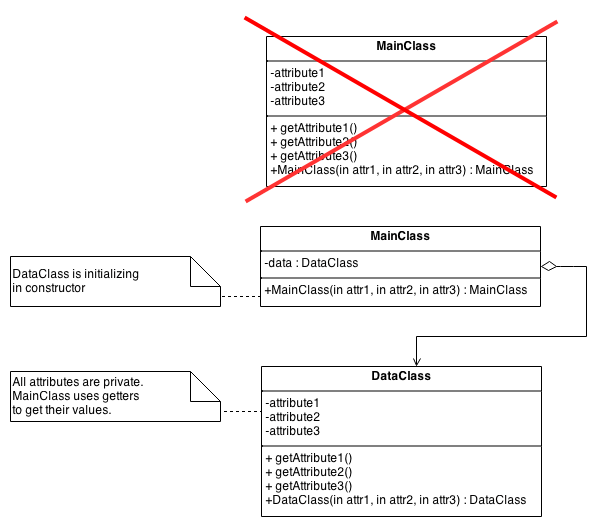

In [12]:
class PrivateClassData:
    def __init__(self):
        self.__private_data1 = None
        self.__private_data2 = None

    def get_private_data1(self):
        return self.__private_data1

    def set_private_data1(self, value):
        # Add any validation logic here if needed
        self.__private_data1 = value

    def get_private_data2(self):
        return self.__private_data2

    def set_private_data2(self, value):
        # Add any validation logic here if needed
        self.__private_data2 = value

class MyClass:
    def __init__(self):
        self.__private_data = PrivateClassData()

    def get_private_data1(self):
        return self.__private_data.get_private_data1()

    def set_private_data1(self, value):
        self.__private_data.set_private_data1(value)

    def get_private_data2(self):
        return self.__private_data.get_private_data2()

    def set_private_data2(self, value):
        self.__private_data.set_private_data2(value)

# Client code
if __name__ == "__main__":
    my_obj = MyClass()

    # Access private data using accessor methods
    my_obj.set_private_data1(10)
    my_obj.set_private_data2("Hello")

    # Get private data using accessor methods
    print("Private Data 1:", my_obj.get_private_data1())
    print("Private Data 2:", my_obj.get_private_data2())


Private Data 1: 10
Private Data 2: Hello


#Proxy
An object representing another object (Source: https://sourcemaking.com/design_patterns/proxy)

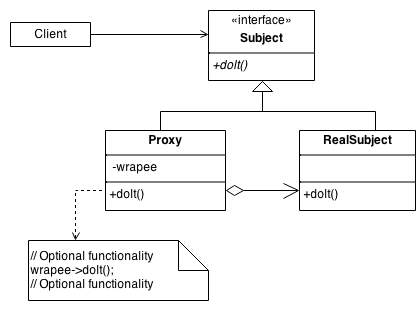

In [13]:
# Subject interface
class Subject:
    def request(self):
        pass

# RealSubject class
class RealSubject(Subject):
    def request(self):
        return "RealSubject: Handling request"

# Proxy class
class Proxy(Subject):
    def __init__(self):
        self._real_subject = None

    def request(self):
        if self._real_subject is None:
            self._real_subject = RealSubject()
        return f"Proxy: Calling RealSubject -> {self._real_subject.request()}"

# Client code
if __name__ == "__main__":
    # Client interacts with the proxy object
    proxy = Proxy()
    print(proxy.request())


Proxy: Calling RealSubject -> RealSubject: Handling request
